# 🎯 **Project Overview**  
Dalam proyek ini, kita akan melakukan **web scraping** untuk mengambil **ulasan pengguna** dari aplikasi **Sololearn: Learn to code** di Google Play Store. 

## 🔧 **Libraries Used**

In [64]:
from google_play_scraper import reviews, Sort, app

# Data & Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP dan Preprocessing
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import contractions
import re
import unicodedata
import spacy

# Model dan Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# WordCloud
from wordcloud import WordCloud

# Utility
from collections import Counter

## 🏁 **Tahapan Proyek**  

### 1️⃣  **Scraping Data** → Mengambil ulasan aplikasi menggunakan `google_play_scraper`

In [65]:
info = app('com.sololearn')  # ID aplikasi sololearn
print("Versi terbaru:", info['version'])

Versi terbaru: 4.107.0


versi terbaru hanya 170 baris, jadi diambil berdasarkan 2 versi terakhir

In [66]:
# Ambil 1000 review terbaru
result, _ = reviews(
    'com.sololearn',
    lang='en',
    count=1000,
    sort=Sort.NEWEST
)

# Simpan ke dalam variabel filtered_reviews agar tetap kompatibel
filtered_reviews = result

In [67]:
# Simpan hasil filter ke dalam DataFrame
df = pd.DataFrame(filtered_reviews)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d7232517-bacf-4bed-89e9-50042fb221a8,Kartik Shukla,https://play-lh.googleusercontent.com/a/ACg8oc...,very good for beginners,5,0,4.107.0,2025-06-14 23:15:01,None,NaT,4.107.0
1,ebafd266-b50f-4bf9-83aa-179b0a472d4f,Ravi Kumar,https://play-lh.googleusercontent.com/a/ACg8oc...,this is very useful app,5,0,4.107.0,2025-06-14 18:02:47,None,NaT,4.107.0
2,ddcdd94d-6c5c-4103-9e86-ae0fff8f750b,‫نواكشوط ”ماموني“ ميديا‬‎,https://play-lh.googleusercontent.com/a-/ALV-U...,ممتاز,5,0,4.107.0,2025-06-14 10:58:44,None,NaT,4.107.0
3,590e823c-45a8-4aa1-9988-ae3b90cc34f7,ADHAM MAHMOD,https://play-lh.googleusercontent.com/a/ACg8oc...,it's very good,5,0,4.107.0,2025-06-14 08:48:21,None,NaT,4.107.0
4,776d93d2-2be5-41b3-9329-9ec3a5c16499,Dipangshu Dhar,https://play-lh.googleusercontent.com/a-/ALV-U...,very good application to learn something new a...,5,0,4.107.0,2025-06-14 08:45:08,None,NaT,4.107.0
...,...,...,...,...,...,...,...,...,...,...,...
995,62c0eaa5-fe56-47fa-b7c3-895922e64c46,Prince Dike,https://play-lh.googleusercontent.com/a-/ALV-U...,educative app keep it up,4,0,4.97.1,2025-03-12 04:31:00,"Hello,\nThanks for your four-star rating! If t...",2025-03-21 19:07:40,4.97.1
996,8b50a75b-72af-4b90-ac82-668043fadc92,Roop Lal,https://play-lh.googleusercontent.com/a/ACg8oc...,👍,3,0,4.102.0,2025-03-12 00:43:25,"Hi,\n\nThanks for your feedback!\n\nWe couldn’...",2025-03-21 19:00:00,4.102.0
997,f4ebfb7a-b413-4825-91e4-7b89bd03f0a2,Wayne Hyde,https://play-lh.googleusercontent.com/a/ACg8oc...,was supposed to be a free trial.Seventy dollar...,1,0,4.100.0,2025-03-12 00:14:10,"Hello,\n\nThanks for your feedback! We are sor...",2025-03-13 19:46:54,4.100.0
998,131e4602-676a-42ec-8bd8-4f11d93b4c6e,Renee Washington,https://play-lh.googleusercontent.com/a-/ALV-U...,The presence of new knowledge is incredible:),5,0,4.102.0,2025-03-11 22:51:17,None,NaT,4.102.0


In [68]:
output_path = "../data/review_sololearn.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_sololearn.xlsx


In [69]:
# # Import data
# file_path = "../data/review_sololearn.xlsx"
# df = pd.read_excel(file_path)
# df.head()

In [70]:
df2 = df[['content', 'score']].copy()
df2

,content,score
0,very good for beginners,5
1,this is very useful app,5
2,ممتاز,5
3,it's very good,5
4,very good application to learn something new a...,5
...,...,...
995,educative app keep it up,4
996,👍,3
997,was supposed to be a free trial.Seventy dollar...,1
998,The presence of new knowledge is incredible:),5


### 2️⃣  **Explore Data** → Mengeksplorasi ulasan aplikasi yang telah diambil

In [71]:
# Melihat jumlah rating ulasan App
df2['score'].value_counts()

score
5    658
4    169
1     78
3     57
2     38
Name: count, dtype: int64

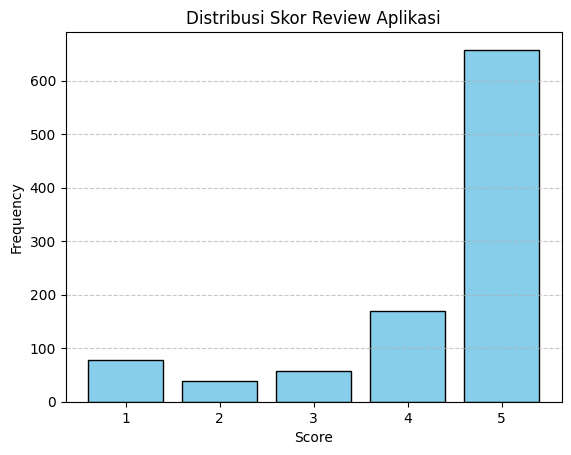

In [72]:
# Histogram skor 1–5
plt.hist(df2['score'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks([1, 2, 3, 4, 5])  # Skor tetap integer
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribusi Skor Review Aplikasi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [73]:
# Rangkuman statistik
df2.describe().loc[:, ['score']]

,score
count,1000.000000
mean,4.291000
std,1.218936
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='at'>

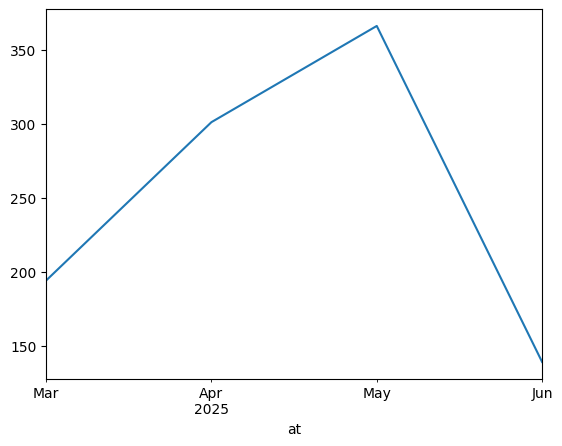

In [74]:
# Grafik jumlah review per bulan.
df['at'] = pd.to_datetime(df['at'])  # Pastikan format datetime
df.set_index('at').resample('ME').count()['reviewId'].plot()


### 3️⃣ **Tahapan Preprocessing**

In [75]:
# ✅ 1. Handling Missing Values → Menghapus atau mengisi data yang kosong  
print(df2.isnull().sum())

content    0
score      0
dtype: int64


In [76]:
# ✅ 2. Lowercasing → Mengubah seluruh teks menjadi huruf kecil  
df2['content_clean'] = df2['content'].astype(str).str.lower()
df2.head(5)

,content,score,content_clean
0,very good for beginners,5,very good for beginners
1,this is very useful app,5,this is very useful app
2,ممتاز,5,ممتاز
3,it's very good,5,it's very good
4,very good application to learn something new a...,5,very good application to learn something new a...


In [77]:
# ✅ 3. Expand Contraction → Mengubah bentuk singkatan menjadi bentuk lengkap (e.g., don't → do not)  
df2['content_clean'] = df2['content_clean'].apply(lambda x: contractions.fix(x))
df2.head(5)

,content,score,content_clean
0,very good for beginners,5,very good for beginners
1,this is very useful app,5,this is very useful app
2,ممتاز,5,ممتاز
3,it's very good,5,it is very good
4,very good application to learn something new a...,5,very good application to learn something new a...


In [78]:
# ✅ 4. Tokenisasi → Memisahkan teks menjadi daftar kata

# Inisialisasi tokenizer Treebank
tokenizer = TreebankWordTokenizer()

# Terapkan tokenisasi
df2['tokens'] = df2['content_clean'].apply(lambda x: tokenizer.tokenize(x))
df2.head(5)


,content,score,content_clean,tokens
0,very good for beginners,5,very good for beginners,"[very, good, for, beginners]"
1,this is very useful app,5,this is very useful app,"[this, is, very, useful, app]"
2,ممتاز,5,ممتاز,[ممتاز]
3,it's very good,5,it is very good,"[it, is, very, good]"
4,very good application to learn something new a...,5,very good application to learn something new a...,"[very, good, application, to, learn, something..."


In [79]:
# ✅ 5. Cabang token untuk VADER 
df2['tokens_vader'] = df2['tokens']

In [80]:
# Stopwords bawaan + custom domain-specific
stop_words = set(stopwords.words('english'))

# Tambahkan custom stopwords domain Play Store
custom_words = {
    'app', 'apps', 'application', 'play', 'store', 'installed', 'install',
    'downloading', 'download', 'device', 'phone', 'mobile', 'using', 'used',
    'google', 'work', 'mimo', 'hub', 'sphero', 'edu','sololearn','codecademy','go','working'  # opsional tergantung fokus topik
}
stop_words.update(custom_words)

# Terapkan stopword removal ke token yang sudah bebas tanda baca
df2['tokens_clean'] = df2['tokens'].apply(lambda tokens: [t for t in tokens if t not in stop_words])


In [81]:
def normalize_token(token):
    # Hapus spasi, simbol, dan karakter unicode aneh
    token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8')
    return token.strip()  # Hapus spasi atau newline

def is_alpha(token):
    return token.isalpha()

df2['tokens_clean'] = df2['tokens_clean'].apply(lambda tokens: [
    normalize_token(t).lower()
    for t in tokens
    if is_alpha(normalize_token(t).strip())
])

df2.head(5)

,content,score,content_clean,tokens,tokens_vader,tokens_clean
0,very good for beginners,5,very good for beginners,"[very, good, for, beginners]","[very, good, for, beginners]","[good, beginners]"
1,this is very useful app,5,this is very useful app,"[this, is, very, useful, app]","[this, is, very, useful, app]",[useful]
2,ممتاز,5,ممتاز,[ممتاز],[ممتاز],[]
3,it's very good,5,it is very good,"[it, is, very, good]","[it, is, very, good]",[good]
4,very good application to learn something new a...,5,very good application to learn something new a...,"[very, good, application, to, learn, something...","[very, good, application, to, learn, something...","[good, learn, something, new, skills, ai]"


In [82]:
# Cek baris mana saja yang mengandung token 'nice' sebelum dibersihkan
df2[df2['tokens'].apply(lambda tokens: 'nice' in tokens)]


,content,score,content_clean,tokens,tokens_vader,tokens_clean
9,nice app,5,nice app,"[nice, app]","[nice, app]",[nice]
13,This is a nice platform to start your learning...,4,this is a nice platform to start your learning...,"[this, is, a, nice, platform, to, start, your,...","[this, is, a, nice, platform, to, start, your,...","[nice, platform, start, learning, easily, prov..."
17,This is nice to learn any language but many fe...,4,this is nice to learn any language but many fe...,"[this, is, nice, to, learn, any, language, but...","[this, is, nice, to, learn, any, language, but...","[nice, learn, language, many, features, plz, l..."
34,nice,4,nice,[nice],[nice],[nice]
43,nice 🙂,4,nice 🙂,"[nice, 🙂]","[nice, 🙂]",[nice]
...,...,...,...,...,...,...
901,Very nice 🙂👍🏻,5,very nice 🙂👍🏻,"[very, nice, 🙂👍🏻]","[very, nice, 🙂👍🏻]",[nice]
933,"Just the app is very nice, but the fact that w...",5,"just the app is very nice, but the fact that w...","[just, the, app, is, very, nice, ,, but, the, ...","[just, the, app, is, very, nice, ,, but, the, ...","[nice, fact, get, certificates, omg, way, prov..."
947,nice,5,nice,[nice],[nice],[nice]
960,nice APP,5,nice app,"[nice, app]","[nice, app]",[nice]


In [83]:
#✅ 8. Lemmatization
# Load model spaCy
nlp = spacy.load("en_core_web_sm")

# Fungsi lemmatizer menggunakan spaCy
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Gabungkan token ke dalam satu string untuk diproses
    return [token.lemma_ for token in doc]

# Lemmatisasi kolom 'tokens_vader'
df2['tokens_vader_lemma'] = df2['tokens_vader'].apply(lemmatize_tokens)

# Lemmatisasi kolom 'tokens_clean'
df2['tokens_clean_lemma'] = df2['tokens_clean'].apply(lemmatize_tokens)
df2.head(5)


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_vader_lemma,tokens_clean_lemma
0,very good for beginners,5,very good for beginners,"[very, good, for, beginners]","[very, good, for, beginners]","[good, beginners]","[very, good, for, beginner]","[good, beginner]"
1,this is very useful app,5,this is very useful app,"[this, is, very, useful, app]","[this, is, very, useful, app]",[useful],"[this, be, very, useful, app]",[useful]
2,ممتاز,5,ممتاز,[ممتاز],[ممتاز],[],[ممتاز],[]
3,it's very good,5,it is very good,"[it, is, very, good]","[it, is, very, good]",[good],"[it, be, very, good]",[good]
4,very good application to learn something new a...,5,very good application to learn something new a...,"[very, good, application, to, learn, something...","[very, good, application, to, learn, something...","[good, learn, something, new, skills, ai]","[very, good, application, to, learn, something...","[good, learn, something, new, skill, ai]"


In [84]:
#✅ 9. Removing Rare Words (frekuensi < 3)

# Gabungkan semua token dari seluruh review menjadi satu list
all_clean_lemmas = [token for tokens in df2['tokens_clean_lemma'] for token in tokens]

# Hitung frekuensi kata
token_freq = Counter(all_clean_lemmas)

# Ambil kata-kata yang muncul ≥ 3 kali
min_freq = 3
valid_tokens = set([token for token, freq in token_freq.items() if freq >= min_freq])

# Hapus token yang tidak termasuk dalam set valid_tokens
df2['tokens_clean_final'] = df2['tokens_clean_lemma'].apply(lambda tokens: [t for t in tokens if t in valid_tokens])
df2.head()


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_vader_lemma,tokens_clean_lemma,tokens_clean_final
0,very good for beginners,5,very good for beginners,"[very, good, for, beginners]","[very, good, for, beginners]","[good, beginners]","[very, good, for, beginner]","[good, beginner]","[good, beginner]"
1,this is very useful app,5,this is very useful app,"[this, is, very, useful, app]","[this, is, very, useful, app]",[useful],"[this, be, very, useful, app]",[useful],[useful]
2,ممتاز,5,ممتاز,[ممتاز],[ممتاز],[],[ممتاز],[],[]
3,it's very good,5,it is very good,"[it, is, very, good]","[it, is, very, good]",[good],"[it, be, very, good]",[good],[good]
4,very good application to learn something new a...,5,very good application to learn something new a...,"[very, good, application, to, learn, something...","[very, good, application, to, learn, something...","[good, learn, something, new, skills, ai]","[very, good, application, to, learn, something...","[good, learn, something, new, skill, ai]","[good, learn, something, new, skill, ai]"


In [85]:
# ✅ 10. Handling Missing Values → Menghapus data yang kosong 

print("Jumlah baris SEBELUM pembersihan:", len(df2))

# Hapus baris jika kolom 'tokens' kosong (NaN atau [])
df2 = df2[~df2['tokens_clean_final'].isnull()]                            # Hapus jika NaN
df2 = df2[df2['tokens_clean_final'].apply(lambda x: len(x) > 0)]          # Hapus jika list kosong []

# Reset index agar rapi (opsional)
df2 = df2.reset_index(drop=True)

# Tampilkan jumlah baris setelah pembersihan
print("Jumlah baris SESUDAH pembersihan:", len(df2))

Jumlah baris SEBELUM pembersihan: 1000
Jumlah baris SESUDAH pembersihan: 964


In [86]:
df2.head(5)

,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_vader_lemma,tokens_clean_lemma,tokens_clean_final
0,very good for beginners,5,very good for beginners,"[very, good, for, beginners]","[very, good, for, beginners]","[good, beginners]","[very, good, for, beginner]","[good, beginner]","[good, beginner]"
1,this is very useful app,5,this is very useful app,"[this, is, very, useful, app]","[this, is, very, useful, app]",[useful],"[this, be, very, useful, app]",[useful],[useful]
2,it's very good,5,it is very good,"[it, is, very, good]","[it, is, very, good]",[good],"[it, be, very, good]",[good],[good]
3,very good application to learn something new a...,5,very good application to learn something new a...,"[very, good, application, to, learn, something...","[very, good, application, to, learn, something...","[good, learn, something, new, skills, ai]","[very, good, application, to, learn, something...","[good, learn, something, new, skill, ai]","[good, learn, something, new, skill, ai]"
4,"There is no any button in terms of use, I can'...",2,"there is no any button in terms of use, i cann...","[there, is, no, any, button, in, terms, of, us...","[there, is, no, any, button, in, terms, of, us...","[button, terms, use, agree, use, useless, edit...","[there, be, no, any, button, in, term, of, use...","[button, term, use, agree, use, useless, edit,...","[button, term, use, use, useless, edit, alread..."


### 4️⃣ **Cek Sentiment Analysis - Textblob**

In [87]:
# Hitung sentimen dengan aman menggunakan .loc
df2.loc[:, 'sentiment_polarity'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.polarity)
df2.loc[:, 'sentiment_subjective'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.subjectivity)

In [88]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df2['sentiment_rating'] = df2['score'].apply(lambda x: 'positive' if x > 3 else('neutral' if x == 3  else 'negative'))

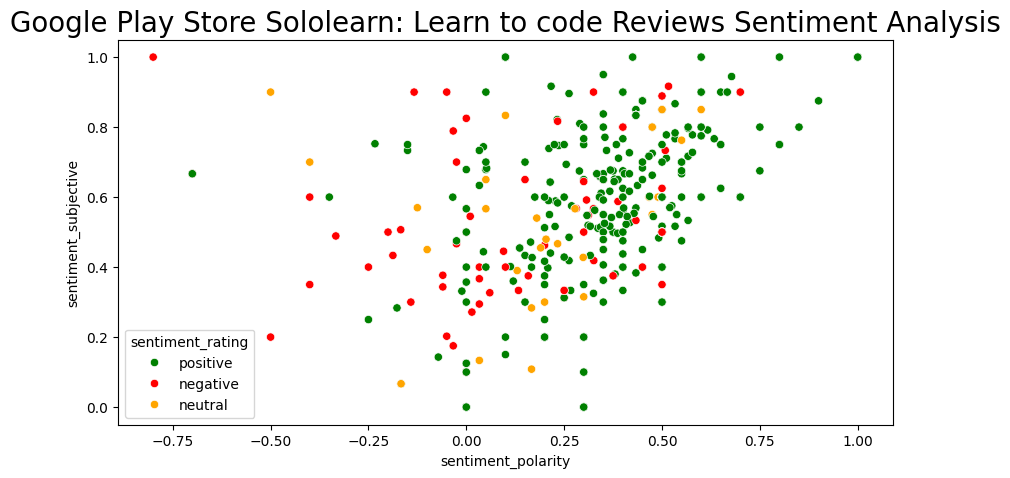

In [89]:
# Mapping warna manual untuk hue
custom_palette = {
    'positive': 'green',
    'neutral': 'orange',
    'negative': 'red'
}

plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='sentiment_polarity',
    y='sentiment_subjective',
    hue='sentiment_rating',
    data=df2,
    edgecolor='white',
    palette=custom_palette
)
plt.title("Google Play Store Sololearn: Learn to code Reviews Sentiment Analysis", fontsize=20)
plt.show()


In [90]:
# Hitung jumlah masing-masing kategori
rating_counts = df2['sentiment_rating'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan jumlah frekuensinya
print("📊 Jumlah Review per Kategori Berdasarkan Score:")
for sentiment, count in rating_counts.items():
    print(f"- {sentiment:<8}: {count} review")

📊 Jumlah Review per Kategori Berdasarkan Score:
- positive: 799 review
- neutral : 55 review
- negative: 110 review


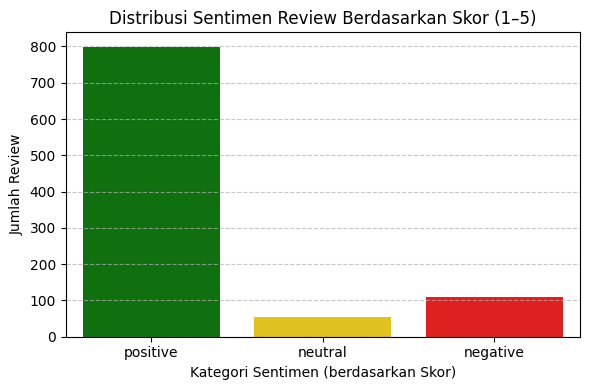

In [91]:
# Siapkan DataFrame untuk visualisasi
rating_df = rating_counts.reset_index()
rating_df.columns = ['sentiment', 'count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=rating_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen (berdasarkan Skor)")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review Berdasarkan Skor (1–5)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

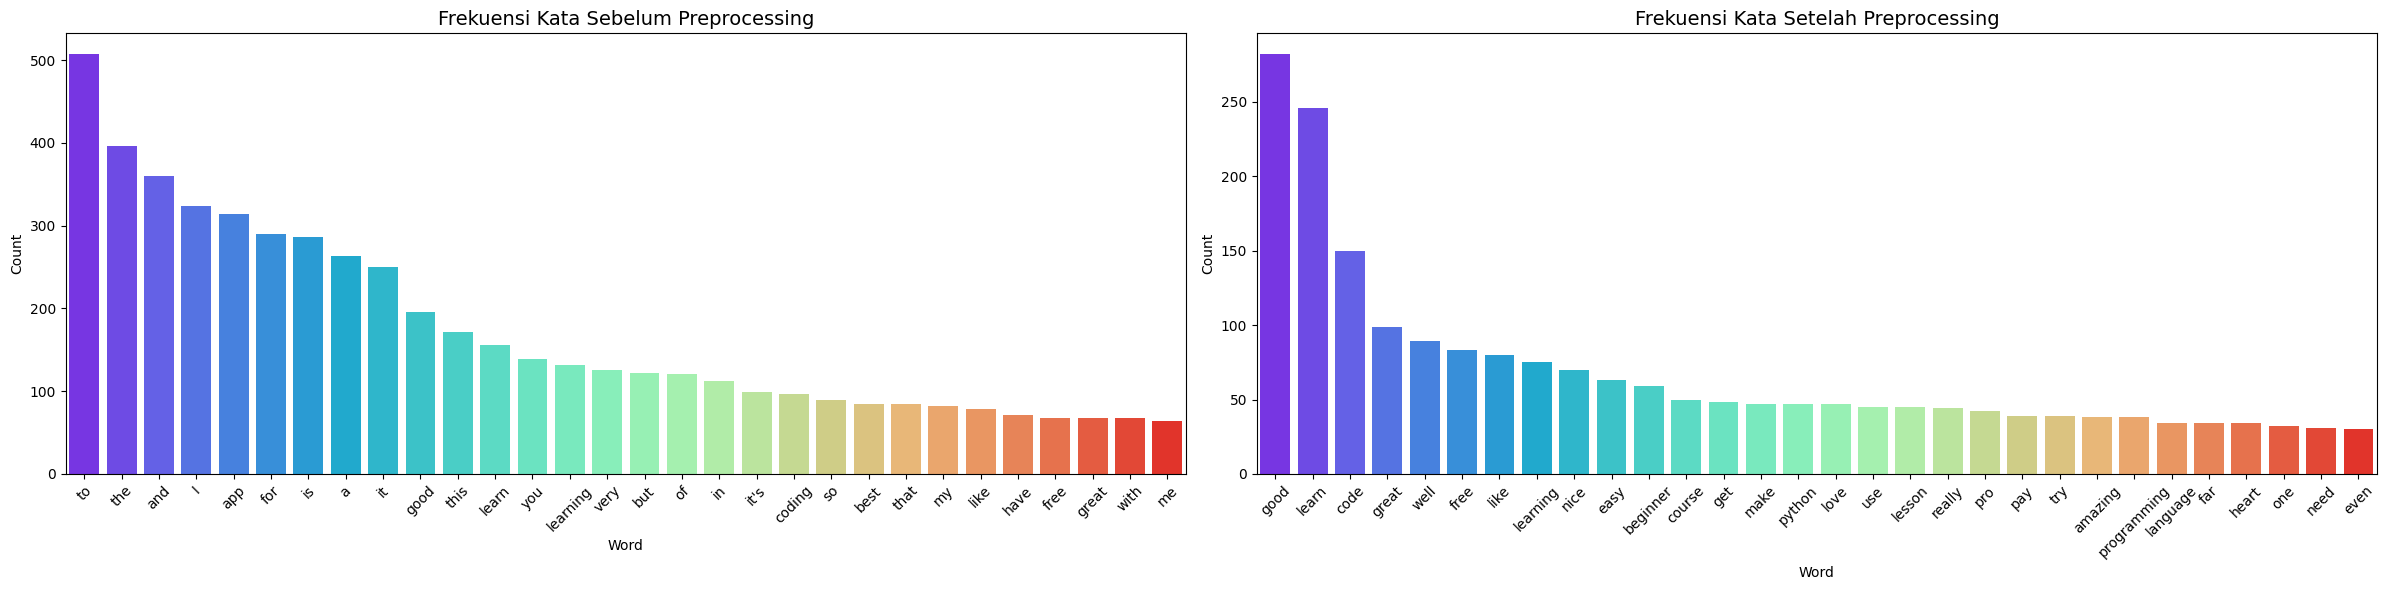

In [92]:
# Fungsi untuk visualisasi frekuensi kata
def freq_words(ax, text_series, terms=30, title="Frekuensi Kata"):
    all_words = ' '.join([text for text in text_series])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    top_words = words_df.nlargest(columns="count", n=terms)
    
    sns.barplot(data=top_words, x="word", y="count", hue="word", palette="rainbow", legend=False, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("Count")
    ax.set_xlabel("Word")
    ax.tick_params(axis='x', rotation=45)

# Pastikan tidak ada nilai NaN
df2['content'] = df2['content'].fillna('').astype(str)

# Gabungkan token menjadi string untuk versi "after"
df2['clean_text_final'] = df2['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

# Buat 2 subplots untuk before & after
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Ganti judul tanpa emoji
freq_words(axes[0], df2['content'], title="Frekuensi Kata Sebelum Preprocessing")
freq_words(axes[1], df2['clean_text_final'], title="Frekuensi Kata Setelah Preprocessing")

plt.tight_layout()
plt.show()

### 5️⃣ **Cek Sentiment Analysis - Vader**

In [93]:
# Unduh lexicon VADER jika belum
# nltk.download('vader_lexicon')

# Inisialisasi analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [94]:
df_vader = df2[['tokens_vader_lemma']].copy()
# Gabungkan token menjadi kalimat
df_vader['text'] = df_vader['tokens_vader_lemma'].apply(lambda tokens: ' '.join(tokens))

df_vader.head(5)

,tokens_vader_lemma,text
0,"[very, good, for, beginner]",very good for beginner
1,"[this, be, very, useful, app]",this be very useful app
2,"[it, be, very, good]",it be very good
3,"[very, good, application, to, learn, something...",very good application to learn something new a...
4,"[there, be, no, any, button, in, term, of, use...","there be no any button in term of use , I can ..."


In [95]:
# Fungsi untuk mengembalikan skor dari VADER
def get_vader_scores(text):
    return vader_analyzer.polarity_scores(text)

# Hitung skor dan ubah jadi kolom DataFrame
vader_scores = df_vader['text'].apply(get_vader_scores).apply(pd.Series)
df_vader = pd.concat([df_vader, vader_scores], axis=1)

In [96]:
# Kategorikan Sentimen
def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_vader['vader_sentiment'] = df_vader['compound'].apply(categorize_sentiment)

In [97]:
df_vader.head(5)

,tokens_vader_lemma,text,neg,neu,pos,compound,vader_sentiment
0,"[very, good, for, beginner]",very good for beginner,0.000,0.484,0.516,0.4927,positive
1,"[this, be, very, useful, app]",this be very useful app,0.000,0.556,0.444,0.4927,positive
2,"[it, be, very, good]",it be very good,0.000,0.484,0.516,0.4927,positive
3,"[very, good, application, to, learn, something...",very good application to learn something new a...,0.000,0.738,0.262,0.4927,positive
4,"[there, be, no, any, button, in, term, of, use...","there be no any button in term of use , I can ...",0.196,0.804,0.000,-0.8726,negative


In [98]:
# Hitung jumlah masing-masing kategori sentimen
sentiment_counts = df_vader['vader_sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan frekuensi
print("📊 Jumlah Review per Kategori Sentimen (VADER):")
for sentiment, count in sentiment_counts.items():
    print(f"- {sentiment.capitalize():<8}: {count} review")

📊 Jumlah Review per Kategori Sentimen (VADER):
- Positive: 827 review
- Neutral : 63 review
- Negative: 74 review


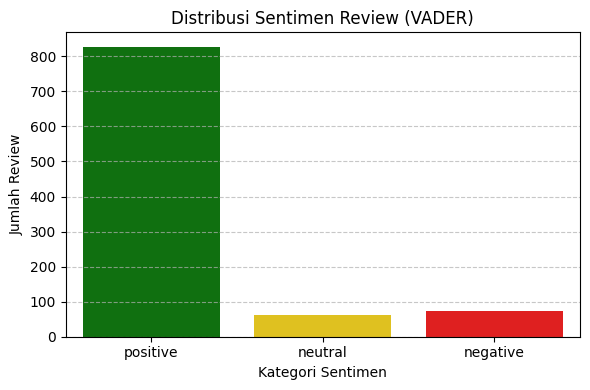

In [99]:
# Siapkan DataFrame untuk visualisasi
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment', 'count']

# Buat barplot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review (VADER)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [100]:
# Gabungkan kolom ke dalam satu DataFrame
df_compare = df2[['score', 'sentiment_rating']].copy()
df_compare['vader_sentiment'] = df_vader['vader_sentiment']

In [101]:
# Hitung jumlah masing-masing kombinasi kategori
compare_counts = df_compare.groupby(['sentiment_rating', 'vader_sentiment']).size().unstack(fill_value=0)
print("📊 Tabel Perbandingan Sentimen (Score vs VADER):\n")
print(compare_counts)

📊 Tabel Perbandingan Sentimen (Score vs VADER):

vader_sentiment   negative  neutral  positive
sentiment_rating                             
negative                42       17        51
neutral                 11        7        37
positive                21       39       739


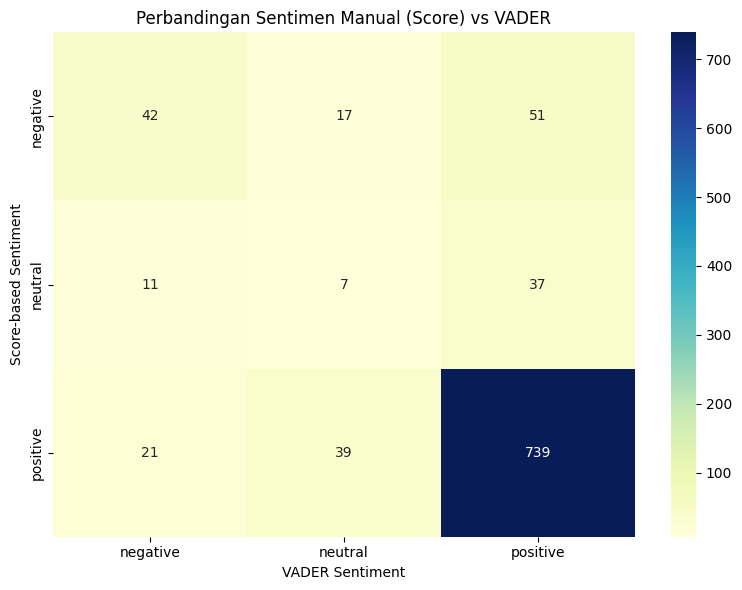

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(compare_counts, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Perbandingan Sentimen Manual (Score) vs VADER")
plt.xlabel("VADER Sentiment")
plt.ylabel("Score-based Sentiment")
plt.tight_layout()
plt.show()

In [103]:
# Buat kolom baru untuk mengecek apakah label cocok
df_compare['sentiment_match'] = df_compare['sentiment_rating'].str.lower() == df_compare['vader_sentiment']

total_reviews = len(df_compare)
matched = df_compare['sentiment_match'].sum()
accuracy = matched / total_reviews
print(f"✅ Total review         : {total_reviews}")
print(f"✅ Jumlah yang cocok    : {matched}")
print(f"📊 Akurasi Kesesuaian   : {accuracy:.2%}")


✅ Total review         : 964
✅ Jumlah yang cocok    : 788
📊 Akurasi Kesesuaian   : 81.74%


### 6️⃣ **Topic Modelling**

In [104]:
# Buat dataset baru untuk data model
df_modelling = df2[['tokens_clean_final']].copy()
df_modelling['clean_text_final'] = df_modelling['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [105]:
df_modelling.head(5)

,tokens_clean_final,clean_text_final
0,"[good, beginner]",good beginner
1,[useful],useful
2,[good],good
3,"[good, learn, something, new, skill, ai]",good learn something new skill ai
4,"[button, term, use, use, useless, edit, alread...",button term use use useless edit already reall...


In [106]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,       # Hapus kata yang terlalu umum (muncul di >95% dokumen)
    min_df=2,          # Hapus kata yang sangat langka (muncul <2 dokumen)
    ngram_range=(1, 2)  # Termasuk bigram: meningkatkan konteks topik
)

# Transformasi ke TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(df_modelling['clean_text_final'])

In [107]:
# Tentukan jumlah topik
n_topics = 5  

# Inisialisasi dan training NMF
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(X_tfidf)


,n_components,5
,init,None
,solver,'cd'
,beta_loss,'frobenius'
,tol,0.0001
,max_iter,200
,random_state,42
,alpha_W,0.0
,alpha_H,'same'
,l1_ratio,0.0
,verbose,0


In [108]:
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"\n🧠 Topik {topic_idx+1}:")
        print(", ".join(top_features))

# Panggil fungsi
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf_model, tfidf_feature_names)


🧠 Topik 1:
good, good learning, learning, good beginner, beginner, good learn, good code, far, code, far good

🧠 Topik 2:
nice, nice learn, helpful, pretty nice, nice easy, pretty, heart, code, give, level

🧠 Topik 3:
great, great learning, learning, great learn, far, programming, code, need, one, love

🧠 Topik 4:
well, learn, code, learn code, well learn, easy, easy learn, like, free, beginner

🧠 Topik 5:
amazing, free, wow, thank, coding, love, site, class, really, like


In [109]:
# Mapping topik ke label tematik (edit sesuai kebutuhan dan interpretasi manual)
topic_labels = {
    0: "Topik 1 - Pengalaman Belajar Awal yang Positif",
    1: "Topik 2 - Belajar yang Menyenangkan & Menginspirasi",
    2: "Topik 3 - Kualitas Platform Belajar Programming",
    3: "Topik 4 - Kemudahan dan Aksesibilitas untuk Pemula",
    4: "Topik 5 - Antusiasme & Kepuasan Pengguna"
}
def display_labeled_topics(model, feature_names, topic_labels, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        label = topic_labels.get(topic_idx, f"Topik {topic_idx+1}")  # fallback jika label tidak tersedia
        print(f"\n🧠 Topik {label}")
        print("🔑 Kata Kunci:", ", ".join(top_features))

# Panggil fungsi
display_labeled_topics(nmf_model, tfidf_feature_names, topic_labels)


🧠 Topik Topik 1 - Pengalaman Belajar Awal yang Positif
🔑 Kata Kunci: good, good learning, learning, good beginner, beginner, good learn, good code, far, code, far good

🧠 Topik Topik 2 - Belajar yang Menyenangkan & Menginspirasi
🔑 Kata Kunci: nice, nice learn, helpful, pretty nice, nice easy, pretty, heart, code, give, level

🧠 Topik Topik 3 - Kualitas Platform Belajar Programming
🔑 Kata Kunci: great, great learning, learning, great learn, far, programming, code, need, one, love

🧠 Topik Topik 4 - Kemudahan dan Aksesibilitas untuk Pemula
🔑 Kata Kunci: well, learn, code, learn code, well learn, easy, easy learn, like, free, beginner

🧠 Topik Topik 5 - Antusiasme & Kepuasan Pengguna
🔑 Kata Kunci: amazing, free, wow, thank, coding, love, site, class, really, like


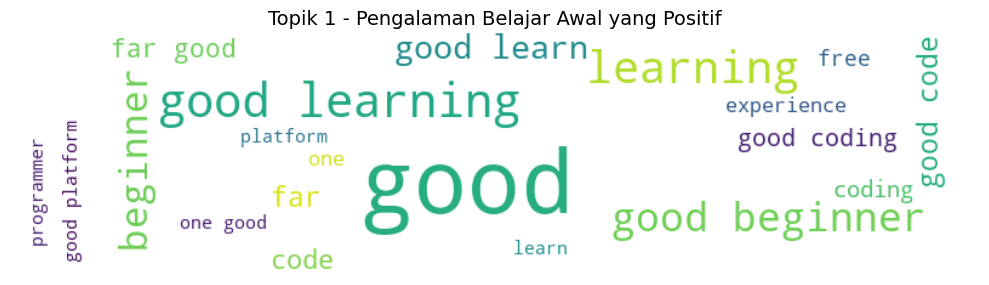

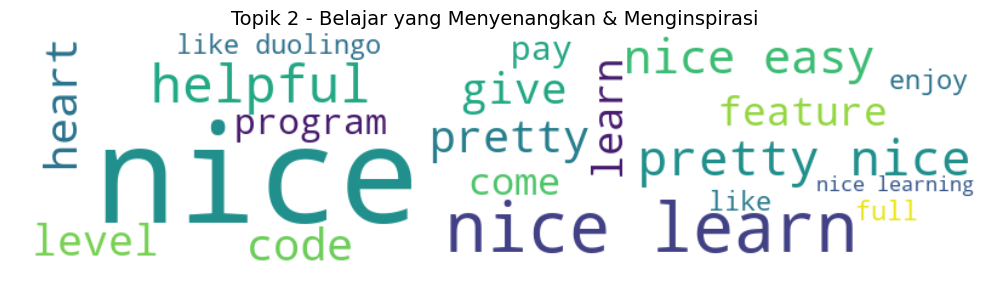

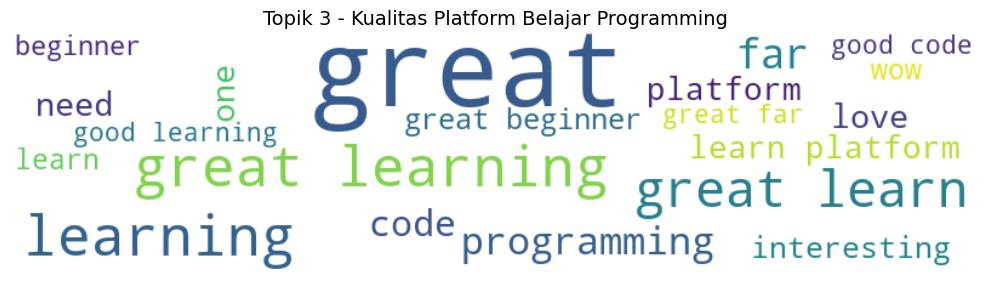

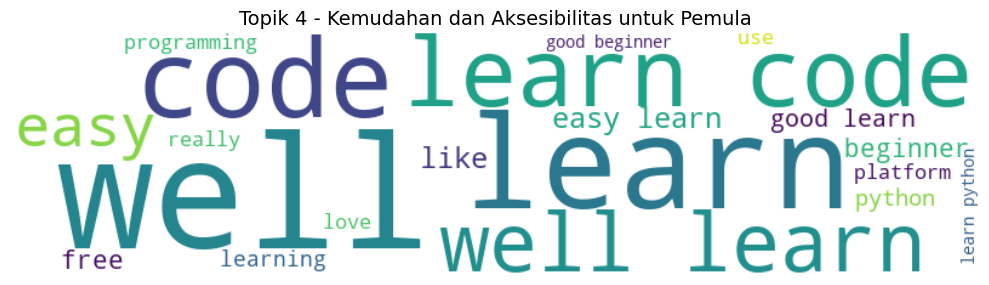

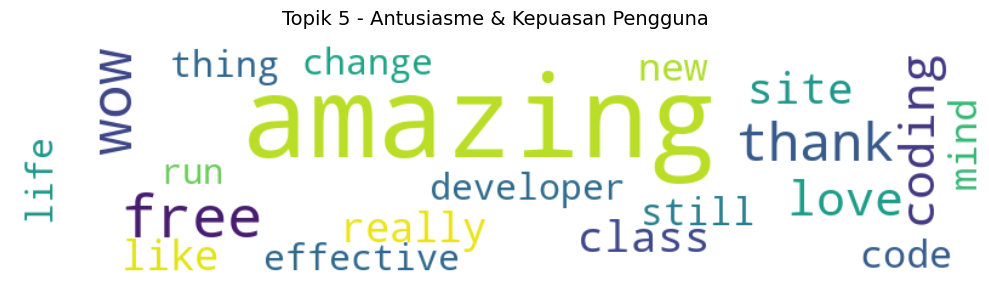

In [110]:
def plot_wordclouds_with_labels(model, feature_names, topic_labels, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        top_features = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=200, background_color='white').generate_from_frequencies(top_features)

        label = topic_labels.get(topic_idx, f"Topik {topic_idx + 1}")
        
        plt.figure(figsize=(10, 3))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{label}", fontsize=14)
        plt.tight_layout()
        plt.show()


# Jalankan visualisasi WordCloud
plot_wordclouds_with_labels(nmf_model, tfidf_feature_names, topic_labels)

In [111]:
# Dapatkan distribusi topik tiap dokumen
topic_distribution = nmf_model.transform(X_tfidf)

# Ambil topik dominan untuk setiap review
df_modelling['dominant_topic'] = topic_distribution.argmax(axis=1)

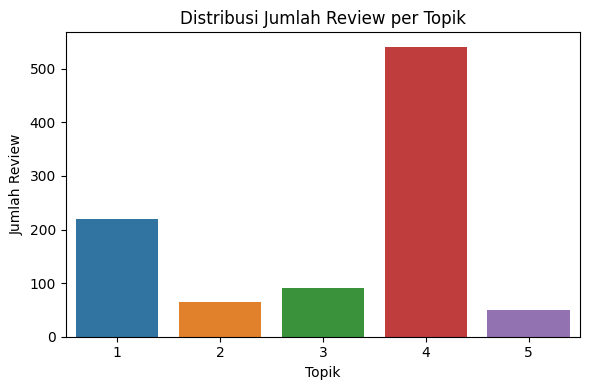

In [112]:
# Buat salinan kolom untuk ditampilkan sebagai 1-based indexing
df_modelling['dominant_topic_display'] = df_modelling['dominant_topic'] + 1

# Visualisasi distribusi topik dengan label mulai dari 1
plt.figure(figsize=(6, 4))
sns.countplot(
    x='dominant_topic_display',
    data=df_modelling,
    hue='dominant_topic_display',
    palette='tab10',
    legend=False
)
plt.title("Distribusi Jumlah Review per Topik")
plt.xlabel("Topik")
plt.ylabel("Jumlah Review")
plt.tight_layout()
plt.show()


In [113]:
df_modelling['jenis_topik'] = df_modelling['dominant_topic'].map(topic_labels) 
df_modelling.head(5)

,tokens_clean_final,clean_text_final,dominant_topic,dominant_topic_display,jenis_topik
0,"[good, beginner]",good beginner,0,1,Topik 1 - Pengalaman Belajar Awal yang Positif
1,[useful],useful,3,4,Topik 4 - Kemudahan dan Aksesibilitas untuk Pe...
2,[good],good,0,1,Topik 1 - Pengalaman Belajar Awal yang Positif
3,"[good, learn, something, new, skill, ai]",good learn something new skill ai,3,4,Topik 4 - Kemudahan dan Aksesibilitas untuk Pe...
4,"[button, term, use, use, useless, edit, alread...",button term use use useless edit already reall...,0,1,Topik 1 - Pengalaman Belajar Awal yang Positif


### 7️⃣ **Clustering**

In [114]:
# Buat dataset baru untuk data model
df_clustering = df2[['tokens_clean_final']].copy()
df_clustering['clean_text_final'] = df_clustering['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [115]:
df_clustering.head(5)

,tokens_clean_final,clean_text_final
0,"[good, beginner]",good beginner
1,[useful],useful
2,[good],good
3,"[good, learn, something, new, skill, ai]",good learn something new skill ai
4,"[button, term, use, use, useless, edit, alread...",button term use use useless edit already reall...


In [116]:
# Vectorizer untuk clustering (gunakan unigram dulu agar stabil)
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english',
    ngram_range=(1, 1)
)

X_tfidf = tfidf_vectorizer.fit_transform(df_clustering['clean_text_final'])

In [117]:
# Tentukan jumlah cluster (misalnya 5, bisa diuji nanti)
n_clusters = 5
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(X_tfidf)

# Simpan label cluster ke DataFrame
df_clustering['cluster'] = kmeans_model.labels_

In [118]:
# Ambil nama fitur dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
def show_top_keywords_per_cluster(kmeans_model, feature_names, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil index fitur tertinggi
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        print(f"\n🔷 Cluster {cluster_num}:")
        print("   " + ", ".join(top_keywords))

# Panggil fungsi
show_top_keywords_per_cluster(kmeans_model, feature_names)


🔷 Cluster 0:
   learn, code, good, easy, beginner, platform, python, great, learning, way

🔷 Cluster 1:
   good, learning, beginner, code, far, coding, learn, fun, experience, helpful

🔷 Cluster 2:
   nice, great, love, like, good, free, awesome, helpful, learning, easy

🔷 Cluster 3:
   amazing, wow, developer, site, class, course, new, coding, thank, mind

🔷 Cluster 4:
   make, thank, learn, easy, course, good, python, code, free, great


In [119]:
# Mapping label deskriptif untuk tiap cluster
cluster_labels = {
    0: "Cluster 1 - Pengalaman Belajar yang Ringan & Menyenangkan",
    1: "Cluster 2 - Pemula yang Sangat Puas & Terbantu",
    2: "Cluster 3 - Proses Belajar yang Seru & Bertahap",
    3: "Cluster 4 - Platform Coding yang Kuat & Ramah Pemula",
    4: "Cluster 5 - Akses Mudah & Fitur Berguna di Sololearn"
}



def show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil top-n kata per cluster
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        # Ambil label deskriptif dari mapping
        label = cluster_labels.get(cluster_num, f"Cluster {cluster_num}")
        
        print(f"\n🔷 {label}:")
        print("   " + ", ".join(top_keywords))

show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels)


🔷 Cluster 1 - Pengalaman Belajar yang Ringan & Menyenangkan:
   learn, code, good, easy, beginner, platform, python, great, learning, way

🔷 Cluster 2 - Pemula yang Sangat Puas & Terbantu:
   good, learning, beginner, code, far, coding, learn, fun, experience, helpful

🔷 Cluster 3 - Proses Belajar yang Seru & Bertahap:
   nice, great, love, like, good, free, awesome, helpful, learning, easy

🔷 Cluster 4 - Platform Coding yang Kuat & Ramah Pemula:
   amazing, wow, developer, site, class, course, new, coding, thank, mind

🔷 Cluster 5 - Akses Mudah & Fitur Berguna di Sololearn:
   make, thank, learn, easy, course, good, python, code, free, great


In [120]:
# Reduksi dimensi
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_results = tsne_model.fit_transform(X_tfidf.toarray())

# Simpan hasil TSNE ke DataFrame
df_clustering['tsne_x'] = tsne_results[:, 0]
df_clustering['tsne_y'] = tsne_results[:, 1]

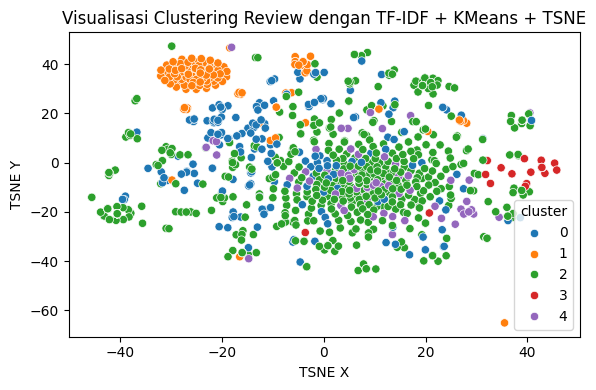

In [121]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='tsne_x', y='tsne_y',
    hue='cluster',
    data=df_clustering,
    palette='tab10',
    legend='full'
)

plt.title("Visualisasi Clustering Review dengan TF-IDF + KMeans + TSNE")
plt.xlabel("TSNE X")
plt.ylabel("TSNE Y")
plt.tight_layout()
plt.show()

In [122]:
# Buat kolom baru berdasarkan mapping
df_clustering['cluster_label'] = df_clustering['cluster'].map(cluster_labels)
df_clustering.head(5)

,tokens_clean_final,clean_text_final,cluster,tsne_x,tsne_y,cluster_label
0,"[good, beginner]",good beginner,1,-9.321801,22.528963,Cluster 2 - Pemula yang Sangat Puas & Terbantu
1,[useful],useful,2,-9.122431,-0.082973,Cluster 3 - Proses Belajar yang Seru & Bertahap
2,[good],good,1,-21.333479,38.841557,Cluster 2 - Pemula yang Sangat Puas & Terbantu
3,"[good, learn, something, new, skill, ai]",good learn something new skill ai,0,23.254972,-27.260765,Cluster 1 - Pengalaman Belajar yang Ringan & M...
4,"[button, term, use, use, useless, edit, alread...",button term use use useless edit already reall...,2,-17.875654,-1.927938,Cluster 3 - Proses Belajar yang Seru & Bertahap


### 8️⃣ **Penggabungan Data Hasil Review**

In [123]:
# Pastikan indexnya sejajar dan urutan review konsisten
df_final = pd.concat([
    df2[['content', 'score', 'sentiment_rating']].reset_index(drop=True),
    df_vader[['vader_sentiment']].reset_index(drop=True),
    df_modelling[['jenis_topik']].reset_index(drop=True),
    df_clustering[['cluster_label']].reset_index(drop=True)
], axis=1)

In [124]:
df_final.head(5)

,content,score,sentiment_rating,vader_sentiment,jenis_topik,cluster_label
0,very good for beginners,5,positive,positive,Topik 1 - Pengalaman Belajar Awal yang Positif,Cluster 2 - Pemula yang Sangat Puas & Terbantu
1,this is very useful app,5,positive,positive,Topik 4 - Kemudahan dan Aksesibilitas untuk Pe...,Cluster 3 - Proses Belajar yang Seru & Bertahap
2,it's very good,5,positive,positive,Topik 1 - Pengalaman Belajar Awal yang Positif,Cluster 2 - Pemula yang Sangat Puas & Terbantu
3,very good application to learn something new a...,5,positive,positive,Topik 4 - Kemudahan dan Aksesibilitas untuk Pe...,Cluster 1 - Pengalaman Belajar yang Ringan & M...
4,"There is no any button in terms of use, I can'...",2,negative,negative,Topik 1 - Pengalaman Belajar Awal yang Positif,Cluster 3 - Proses Belajar yang Seru & Bertahap


In [125]:
output_path = "../data/review_final_sololearn.xlsx"
df_final.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_final_sololearn.xlsx
